In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.cross_decomposition import PLSRegression
import time
from sklearn.model_selection import GridSearchCV
import xgboost 

### 1.EDA

#### loading data

In [3]:
test_df=pd.read_csv('test.csv')
test_df.shape

(49342, 4992)

In [4]:
train_df=pd.read_csv('train.csv')
train_df.shape

(4459, 4993)

In [5]:
test_df.head(2)

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df.head(2)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


#### Describe data

In [7]:
# summary statistics of all variables
train_df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


<span style="color:blue">Here we can see that std and mean are 10^4,10^5 something like that so reduce the rang of the values we use nature log.</span>

In [124]:
# taking the log of the features and target values
#df1_log=np.log(df1.replace(0,1))
#df1_log.describe()
x=train_df.drop(['target','ID'],axis=1)
y=train_df['target']

logx=np.log(x.replace(0,1))
logy=np.log(y)

logx.describe()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,...,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000
mean,0.111931,0.011597,0.101112,0.007179,0.016260,0.147267,0.016285,0.016526,4.833023,0.401984,...,0.923769,0.607043,2.239902,0.569463,0.002998,0.112875,0.058852,0.129519,0.254749,0.523774
std,1.201320,0.394242,1.183108,0.339115,0.494329,1.432660,0.497697,0.494549,6.912865,2.407642,...,3.541413,2.948096,5.262674,2.937384,0.200211,1.281893,0.930329,1.483744,1.899237,2.722827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.304685,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.811243,15.201805,16.811243,16.510138,18.420681,16.846031,17.504390,16.157316,19.582618,17.909855,...,18.146244,18.632464,18.683045,18.788098,13.369223,19.523657,18.482904,18.757153,17.938896,17.581351


In [8]:
logy.describe()

count    4459.000000
mean       14.490237
std         1.750951
min        10.308953
25%        13.304685
50%        14.630875
75%        15.894952
max        17.504390
Name: target, dtype: float64

#### checking for sparsity of the data set


In [13]:
# https://www.kaggle.com/code/gpreda/santander-value-prediction-extensive-eda

def check_nulls(df):
    nulls = df.isnull().sum(axis=0).reset_index()
    nulls.columns = ['column', 'missing']
    nulls = nulls[nulls['missing']>0]
    nulls = nulls.sort_values(by='missing')
    return nulls    


print(check_nulls(train_df))

print("*"*50)

print(check_nulls(test_df))

Empty DataFrame
Columns: [column, missing]
Index: []
**************************************************
Empty DataFrame
Columns: [column, missing]
Index: []


<span style="color:blue">There is no misssing values in training and test data set.

#### Checking for data sparsity.

In [16]:
# https://www.kaggle.com/code/gpreda/santander-value-prediction-extensive-eda

def check_sparsity(df):
    non_zeros = (df.ne(0).sum(axis=1)).sum()
    total = df.shape[1]*df.shape[0]
    zeros = total - non_zeros
    sparsity = round(zeros / total * 100,2)
    density = round(non_zeros / total * 100,2)
    print(" Total:",total,"\n Zeros:", zeros, "\n Sparsity [%]: ", sparsity, "\n Density [%]: ", density)
    return density

print("This is the sparsity of train data set")
check_sparsity(train_df)

print('*'*70)

print("This is the sparsity of test data set")
check_sparsity(test_df)


This is the sparsity of train data set
 Total: 22263787 
 Zeros: 21554760 
 Sparsity [%]:  96.82 
 Density [%]:  3.18
**********************************************************************
This is the sparsity of test data set
 Total: 246315264 
 Zeros: 242805367 
 Sparsity [%]:  98.58 
 Density [%]:  1.42


1.42

<span style="color:blue">Here we can see quite sparsity in training and more in testing data set

#### looking for Constant columns

In [19]:

def const_col(df):
    colsConstant = []
    columnsList = [x for x in df.columns if not x in ['ID','target']]

    for col in columnsList:
        if df[col].std() == 0: 
            colsConstant.append(col)
    return colsConstant

col1=const_col(train_df)
print('The number of columns which have zero std or no variance in train data set',len(col1))

print('*'*70)

col2=const_col(test_df)
print('The number of columns which have zero std or no variance in test data set ',len(col2))
    

The number of columns which have zero std or no variance in train data set 256
**********************************************************************
The number of columns which have zero std or no variance in test data set  0


<span style="color:blue"> Here we can see that there is constant features in train data set not in test data set which makes all the features in test unique. 

#### looking for any duplicate columns in the data set 


In [20]:
# looking for any duplicate column
# https://www.geeksforgeeks.org/how-to-find-drop-duplicate-columns-in-a-pandas-dataframe/#:~:text=To%20find%20duplicate%20columns%20we,in%20the%20duplicate%20column%20set.

def getDuplicateColumns(df):
    duplicateColumnNames = set()
    for x in tqdm(range(df.shape[1])):               # getting the number of columns
        col = df.iloc[:, x]                    # col
        for y in range(x + 1, df.shape[1]):      # runing the loop from x+1 to end
            otherCol = df.iloc[:, y]             # storing column into othercol
            if col.equals(otherCol):               # camparing col with othercol
                duplicateColumnNames.add(df.columns.values[y])      
    return list(duplicateColumnNames)  #returning the list of the columns which are duplicate

col_11 = getDuplicateColumns(train_df)
print(len(col_11))

print("*"*70)


col_12 = getDuplicateColumns(test_df)
print(len(col_12))

#rslt_df = train_df.drop(columns = getDuplicateColumns(df1))
#rslt_df.columns
#rslt_df.to_csv('rslt_df.csv')

100%|██████████| 4993/4993 [19:35<00:00,  4.25it/s] 


260
**********************************************************************


100%|██████████| 4992/4992 [35:50<00:00,  2.32it/s]  

0


<span style="color:blue"> There are 260 duplicate features in training data set which may overlap with constant conlumns in previous cell above, Because they have zero values in it or only one values which may repeat in other features.

##### <span style="color:blue"> As we can see that there are some features with repeating values and constant values in features which may result into non reducible error in perdicting points by the models.

#### Ploting the data

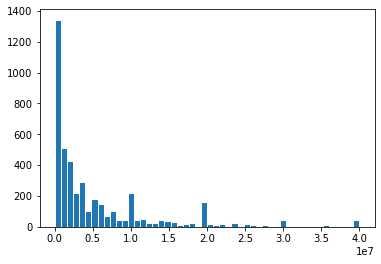

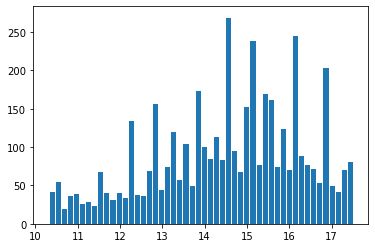

this looks much better


In [22]:
# ploting only target value
target=train_df['target']
plt.hist(target,bins=50,edgecolor="white")
plt.show()

tar=np.log(target)
plt.hist(tar,bins=50,edgecolor='white')
plt.show()
print('this looks much better')

<span style="color:blue">lots of values lies in the range of nature log(x) 13-17.</span>

pdf of target [0.62413097 0.13411079 0.08993048 0.03520969 0.05113254 0.01659565
 0.0123346  0.01435299 0.00874636 0.01345593]
cdf of target [3.0000e+04 4.0270e+06 8.0240e+06 1.2021e+07 1.6018e+07 2.0015e+07
 2.4012e+07 2.8009e+07 3.2006e+07 3.6003e+07 4.0000e+07]


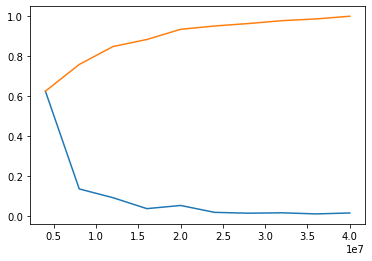

In [10]:
counts, bin_edges = np.histogram(target, bins=10, 
                                 density = True)
counts1, bin_edges1 = np.histogram(tar, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
pdf1 = counts1/(sum(counts1))
print('pdf of target',pdf)
print('cdf of target',bin_edges)
cdf = np.cumsum(pdf)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

PDF of log target= [0.04418031 0.04305898 0.06324288 0.08679076 0.11437542 0.14711819
 0.14240861 0.13590491 0.12155192 0.10136802]
CDF of log target= [10.30895266 11.0284964  11.74804013 12.46758387 13.1871276  13.90667134
 14.62621507 15.34575881 16.06530254 16.78484628 17.50439001]


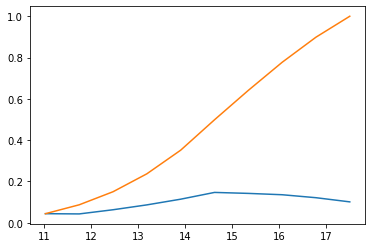

In [11]:
print("PDF of log target=",pdf1)
print('CDF of log target=',bin_edges1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1)

#### Looking out some Correlation between features 

100%|██████████| 24920064/24920064 [00:22<00:00, 1123042.69it/s]


0


(array([4278., 3568., 3026., 2608., 2134., 2026., 1696., 1488., 1284.,
        1124.,  852.,  772.,  610.,  430.,  432.,  338.,  200.,  250.,
         264.,  174.]),
 array([0.5000353 , 0.52503353, 0.55003177, 0.57503   , 0.60002824,
        0.62502647, 0.65002471, 0.67502294, 0.70002118, 0.72501941,
        0.75001765, 0.77501588, 0.80001412, 0.82501235, 0.85001059,
        0.87500882, 0.90000706, 0.92500529, 0.95000353, 0.97500176,
        1.        ]),
 <BarContainer object of 20 artists>)

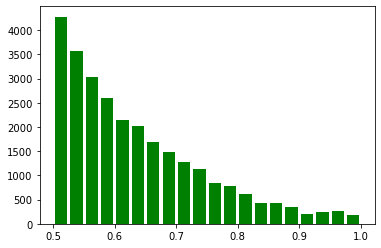

In [38]:
# Correlation
mat=train_df.corr() # correlation

mat=np.array(mat)
flat=mat.flatten()
flat=np.nan_to_num(flat)
li1=[]
li2=[]
for i in tqdm(flat):  # Taking correlation above .5 to 1
    if (i<1) and (i>.5):
        li1.append(i)

# ploting the high correlated number
print(len(li2))
plt.hist(li1,bins=20, color = 'green',
        histtype = 'bar', rwidth = 0.8)



<span style="color:blue">Here I had ploting the number of features which are highly correlated between(0.5 - 1) and number of feature is decreaing as correlation values increases.

<span style="color:blue">As we can see that there is quite a number of highly correlated data which may impact the performance of the model.

c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


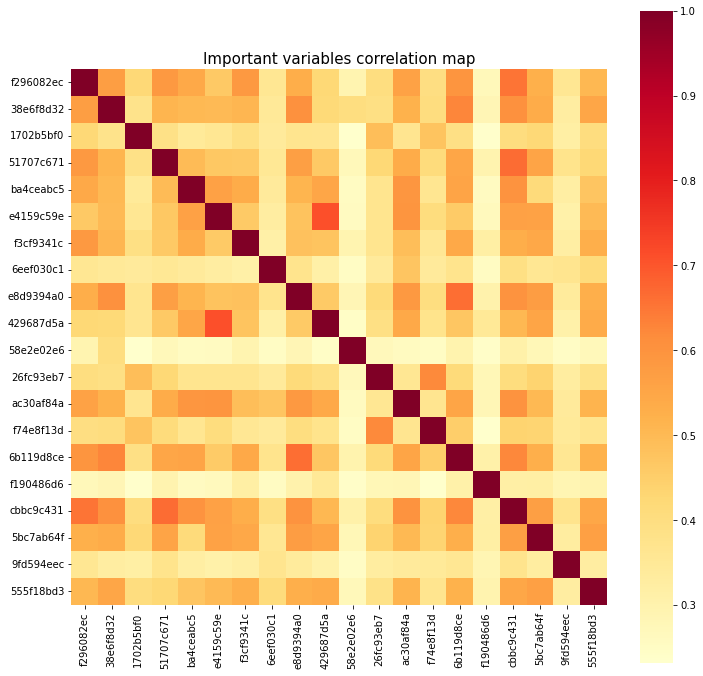

In [32]:
labels=[]
values=[]

for col in train_df.columns:
    if col not in ["ID", "target"]:
        labels.append(col)
        values.append(np.corrcoef(train_df[col].values, train_df["target"].values)[0,1])
corr_df = pd.DataFrame({'columns_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
 
corr_df = corr_df[(corr_df['corr_values']>0.25) | (corr_df['corr_values']<-0.25)]

temp_df = train_df[corr_df.columns_labels.tolist()]
corrmat = temp_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, cmap="YlOrRd")
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [151]:
# here we are taking features with high number of data points
w=[]
q=[]
for i in train_df.columns:
    if (i != 'ID') and (i != 'target'):
        e=train_df[i]
        w.append(e.value_counts().name)
        q.append(e.value_counts()[0])

s=[]
for i in range(len(w)):
    s.append([w[i],q[i]])
    
s.sort(key = lambda x: x[1])    

s[:50]
col=[]
for i in s[:100]:
    col.append(i[0])

#col

ex=[]
ex2=[]
for i in col:
    ex.append(train_df[i])
    ex2.append(logx[i])

c:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\abhis\anaconda3\lib\si

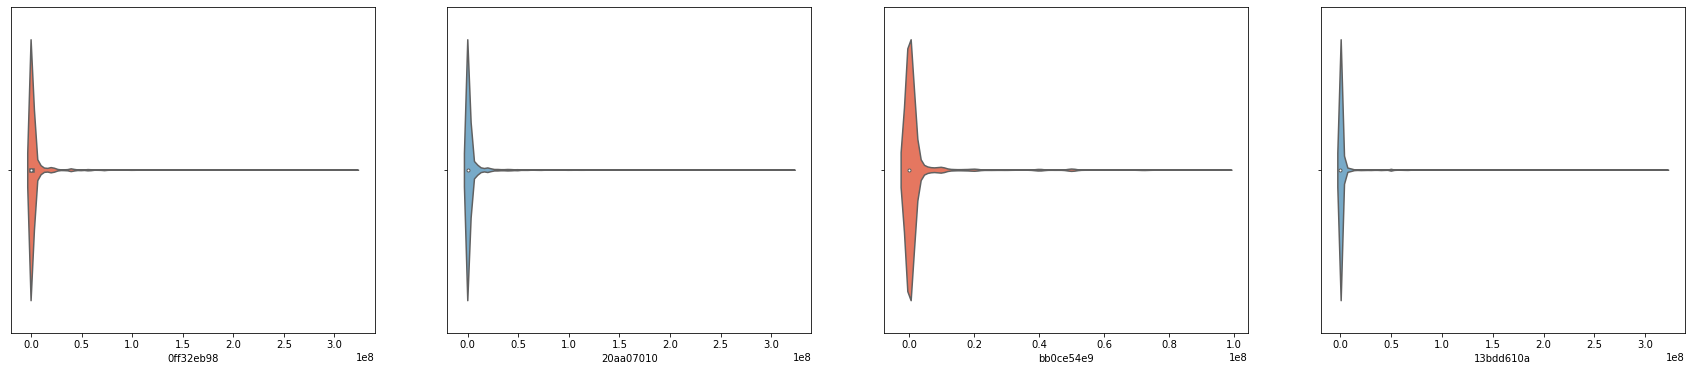

In [147]:
fig, (ax1, ax2 ,ax3 ,ax4 ) = plt.subplots( ncols=4,figsize=(30,6))
sns.violinplot(ex[0], palette="Reds",  showfliers=False,ax=ax1)
sns.violinplot(ex[25], palette="Blues",  showfliers=True,ax=ax2)
sns.violinplot(ex[50], palette="Reds",  showfliers=True,ax=ax3)
sns.violinplot(ex[99], palette="Blues",  showfliers=True,ax=ax4)
plt.show()

c:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\abhis\anaconda3\lib\si

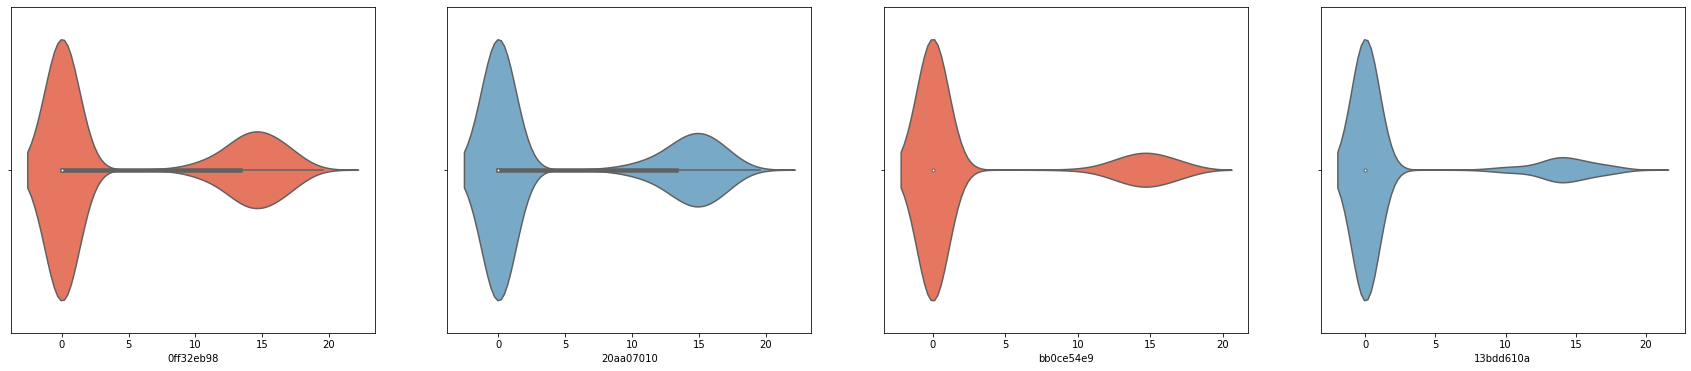

In [150]:
# plotting the same in natural log of the numbers
fig, (ax1, ax2 ,ax3 ,ax4 ) = plt.subplots( ncols=4,figsize=(30,6))
sns.violinplot(ex2[0], palette="Reds",  showfliers=False,ax=ax1)
sns.violinplot(ex2[25], palette="Blues",  showfliers=True,ax=ax2)
sns.violinplot(ex2[50], palette="Reds",  showfliers=True,ax=ax3)
sns.violinplot(ex2[99], palette="Blues",  showfliers=True,ax=ax4)
plt.show()

<span style="color:blue">The above two cells of violin plot shows that distribution of numbers in features which has more number of data points in left and as we go right the number of numbers are decreases and there is patten in reduction of data point or in other words the number of numbers at log(x) at 15 at decreasing.   

#### Diamension reduction

##### TSNE

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA



In [69]:
def what_bracket(trans_value):
  if trans_value <=100000:
    return "Tier 1"
  elif trans_value <= 1000000:
    return "Tier 2"
  elif trans_value <= 2000000:
    return "Tier 3"
  elif trans_value <= 5000000:
    return "Tier 4"
  elif trans_value <= 10000000:
    return 'Tier 5'
  elif trans_value <= 20000000:
    return "Tier 6"
  elif trans_value <= 40000000:
    return "Tier 7"
 

y_tiers = target.apply(what_bracket)

In [70]:
np.unique(y_tiers, return_counts=True)

(array(['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5', 'Tier 6',
        'Tier 7'], dtype=object),
 array([ 330, 1209,  627,  825,  684,  492,  292], dtype=int64))

In [23]:
def normalize(df):
    result = df.copy()
    for feature_name in tqdm(df.columns):
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

result = normalize(x)

100%|██████████| 4991/4991 [01:31<00:00, 54.59it/s] 


In [73]:
result.fillna(0,inplace=True)
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result)

c:\Users\abhis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\abhis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [40]:
results

array([[ 19.678581, -16.191538],
       [-20.610086,  10.214754],
       [ -6.184083, -20.44464 ],
       ...,
       [ -8.52058 , -14.958611],
       [ 18.063282,  -5.761165],
       [  6.175572, -23.438147]], dtype=float32)

<AxesSubplot:>

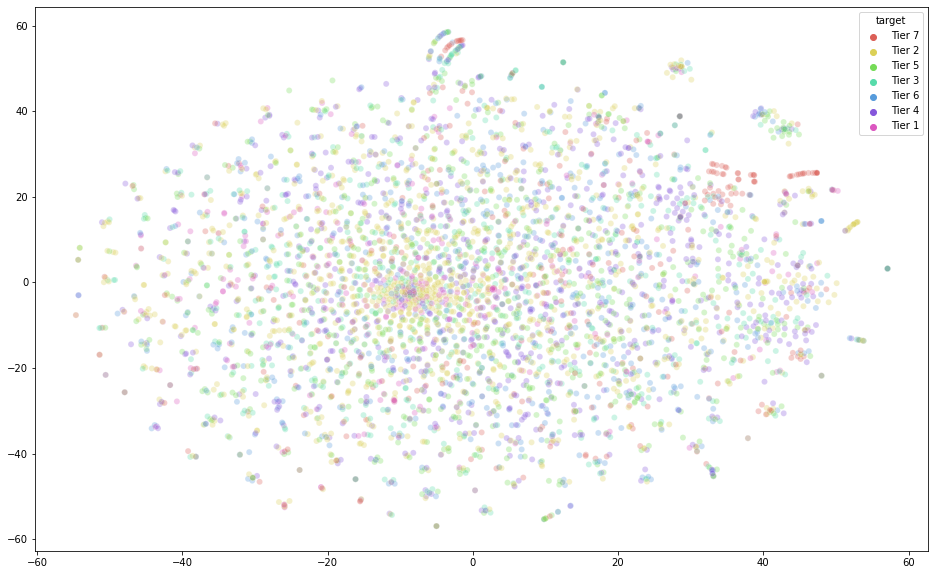

In [74]:
vis_x = results[:, 0]
vis_y = results[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=vis_x, y=vis_y,
    hue=y_tiers,
    palette=sns.color_palette("hls", 7),
    #data=results,
    legend="full",
    alpha=0.3
)



Not much of a patten is seen here.

##### PCA

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(result)


<AxesSubplot:>

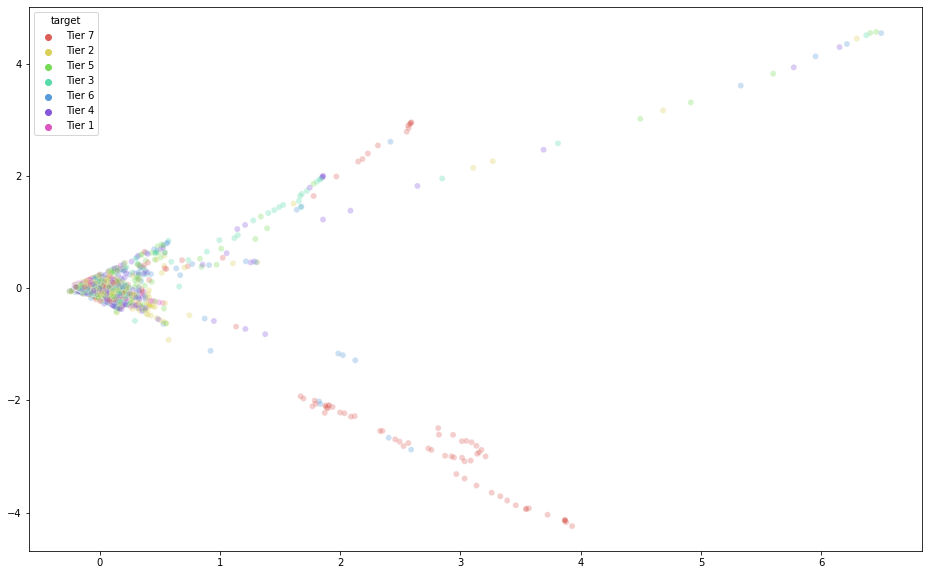

In [83]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_result[:,0], y=pca_result[:,1],
    hue=y_tiers,
    palette=sns.color_palette("hls", 7),
    #data=pca_result,
    legend="full",
    alpha=0.3
)